In [ ]:
import pandas as pd

In [ ]:
data=pd.read_excel('./Q1/Monohulled Sailboats/Monohulled Sailboats.xlsx')
data.head()

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
temp=data[['Length \n(ft)', 'Listing Price (USD)', 'Year', 
       'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
       'Sail Area (sq ft)',  'Average cargo throughput (tons)',
       'GDP (USD billion)', 'GDP per capita (USD)',
       'Average ratio of total logistics costs to GDP']].copy()

In [ ]:
temp.head()

In [ ]:
temp.isnull().sum()

In [ ]:
index_d=temp.dropna().index
temp.dropna(inplace=True)
temp.reset_index(inplace=True,drop=True)

In [ ]:
temp.isnull().sum()

In [ ]:
temp.shape

In [ ]:
temp.dtypes

In [ ]:
temp.columns=['Length(ft)', 'Listing Price (USD)', 'Year', 
       'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
       'Sail Area (sq ft)',  'Average cargo throughput (tons)',
       'GDP (USD billion)', 'GDP per capita (USD)','logistics costs to GDP%']

In [ ]:
temp.to_excel('./Q3/Monohulled Sailboats/temp.xlsx',index=None)

In [ ]:
# 此处所引入的包大部分为下文机器学习算法
import pandas as pd
from numpy import *
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import xgboost as xgb
import lightgbm as lgb
import numpy as np


import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,r2_score

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) 
X=temp[['Length(ft)', 'Year', 
       'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
       'Sail Area (sq ft)',  'Average cargo throughput (tons)',
       'GDP (USD billion)', 'GDP per capita (USD)','logistics costs to GDP%']]
Y=temp['Listing Price (USD)']

tr_x,te_x,tr_y,te_y=train_test_split(X ,Y,test_size=0.1,random_state=5)


model=MLPRegressor(hidden_layer_sizes=10,max_iter=1000).fit(tr_x,tr_y)

y_pred=model.predict(te_x)
print("神经网络:")
print("训练集平均绝对百分比误差:{:.3f}".format(mape(model.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(model.predict(te_x),te_y)))
print("r2_score",r2_score(te_y,y_pred))


In [ ]:


print("\n线性回归:")
logreg = LinearRegression()
logreg.fit(tr_x, tr_y)
y_pred = logreg.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(logreg.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(logreg.predict(te_x),te_y)))
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("r2_score",r2_score(te_y,y_pred))
      
print("\n决策树回归:")
tree=DecisionTreeRegressor(max_depth=50,random_state=0)
tree.fit(tr_x,tr_y)
y_pred = tree.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(tree.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(tree.predict(te_x),te_y)))

print("r2_score",r2_score(te_y,y_pred))
      
      
print("\n随机森林回归:")
rf=RandomForestRegressor(max_depth=20,n_estimators=1000,random_state=0)
rf.fit(tr_x,tr_y)

y_pred = rf.predict(te_x)

print("训练集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(te_x),te_y)))

print("r2_score",r2_score(te_y,y_pred))
      

print("\nLGBM回归:")
lgb_model=lgb.LGBMRegressor()
lgb_model.fit(tr_x,tr_y)
y_pred = lgb_model.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(lgb_model.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(lgb_model.predict(te_x),te_y)))

print("r2_score",r2_score(te_y,y_pred))


print("\nXGBOOST回归:")
xgb_model=xgb.XGBRegressor()
xgb_model.fit(tr_x,tr_y)
y_pred = xgb_model.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(te_x),te_y)))

print("r2_score",r2_score(te_y,y_pred))

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


# 学习曲线函数

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("game num")
    plt.ylabel("score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.savefig('./Q3/Monohulled Sailboats/%s.jpg'%title)
    plt.legend(loc="best")
    plt.show()
    return plt

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(logreg, "LineRegression", tr_x, tr_y, ylim=None, cv=cv, n_jobs=1)
plot_learning_curve(tree, "DecisionTreeClassifier", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)
plot_learning_curve(rf, "RandomForestClassifier", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)
plot_learning_curve(model, "MLPClassifier", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)
plot_learning_curve(lgb_model, "LGBM", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)
plot_learning_curve(xgb_model, "XGBOOST", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)


In [ ]:
import sys
!{sys.executable} -m pip install shap -i https://pypi.tuna.tsinghua.edu.cn/simple

In [ ]:
import shap
shap.initjs()  # notebook环境下，加载用于可视化的JS代码
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)  # 传入特征矩阵X，计算SHAP值

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #正常显示负号
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

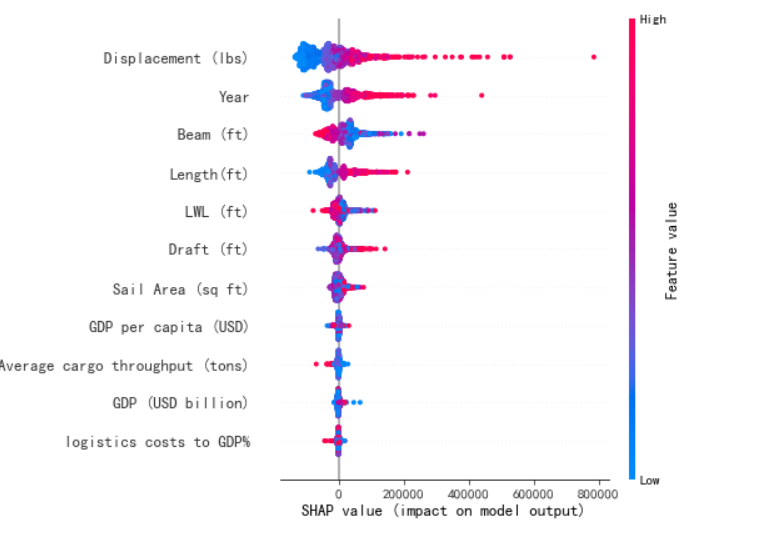

## 查询香港地区的经济数据
### Q3\Ecmy-HngKong.xlsx

In [ ]:
import pandas as pd
echk = pd.read_excel('./Q3/Ecmy-HngKong.xlsx')
echk.columns=['Year','Average cargo throughput (tons)', 'GDP (USD billion)',
       'GDP per capita (USD)', 'logistics costs to GDP%']

In [ ]:
temp.head()

In [ ]:
HKData=temp[['Length(ft)', 'Listing Price (USD)', 'Year', 'LWL (ft)', 'Beam (ft)',
       'Draft (ft)', 'Displacement (lbs)', 'Sail Area (sq ft)']].copy()
# unique_years = HKData['Year'].unique()
# print(unique_years)
HKData.head()

In [ ]:
echk.head()

In [ ]:
HKData = pd.merge(HKData, echk, on='Year', how='outer')

In [ ]:
HKData.head()
HKData.isnull().sum()

In [ ]:
HKData.columns

In [ ]:
X=HKData[['Length(ft)', 'Year', 
       'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
       'Sail Area (sq ft)',  'Average cargo throughput (tons)',
       'GDP (USD billion)', 'GDP per capita (USD)','logistics costs to GDP%']]
# X=HKData[['Length(ft)', 'Year', 
#        'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
#        'Sail Area (sq ft)', 'GDP (USD billion)']]
Y=HKData['Listing Price (USD)']

hkrf=RandomForestRegressor(max_depth=20,n_estimators=1000,random_state=0)
hkrf.fit(X,Y)
y_pred = lgb_model.predict(X)
print("平均绝对百分比误差:{:.3f}".format(mape(y_pred,Y)))

print("r2_score",r2_score(y_pred,Y))

In [ ]:
DF=pd.DataFrame()

In [ ]:
DF['true_Price']=Y

In [ ]:
import numpy as np
np.set_printoptions(suppress=True)  # 取消科学计数法
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [ ]:
y_pred = lgb_model.predict(HKData[X.columns])
DF['simulation_HK_Price']=y_pred

In [ ]:
data.head()

In [ ]:
DF['Country/Region/State']=data.iloc[index_d]['Country/Region/State '].values
DF['Make Variant']=data.iloc[index_d]['Make Variant'].values

In [ ]:
from collections import Counter
DF_type_unique = data['Make Variant'].unique()
for i in DF_type_unique:
    # print(type(i))
    if(data['Make Variant'].value_counts()[i]>40):
        print(i)

In [ ]:
DF

In [ ]:
DF['true_Price']=DF['true_Price'].astype('float64')
DF.dtypes
# DF.isnull().sum()

In [ ]:
import pandas as pd
import numpy as np

# 计算决定系数
r2 = r2_score(DF['true_Price'], DF['simulation_HK_Price'])
# 将结果添加到数据框中
DF['PPD'] = r2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据集
df = DF

# 绘制真实结果和模型预测结果的散点图
plt.scatter(x=df['true_Price'], y=df['simulation_HK_Price'], color='#2A9D8E')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

# 绘制决定系数的条形图
sns.barplot(x='PPD', y='true_Price', data=df, color='#E9C46B')
plt.xlabel('R-squared')
plt.ylabel('True Price')

# 显示图形
plt.show()


In [ ]:

# DF = DF.drop('匹配度', axis=1)
DF.to_excel('./Q3/dan-HK-pipeidu-DF.xlsx', index=False)


In [ ]:
DF.to_excel('./Q3/DF+pp.xlsx')


In [ ]:
DF.to_excel('./Q3/Monohulled Sailboats/HK-dan-DF.xlsx',index=None)

In [ ]:
DF.drop_duplicates(subset=['Country/Region/State','Make Variant'],keep='first').to_excel('./Q3/Monohulled Sailboats/DF1.xlsx',index=None)

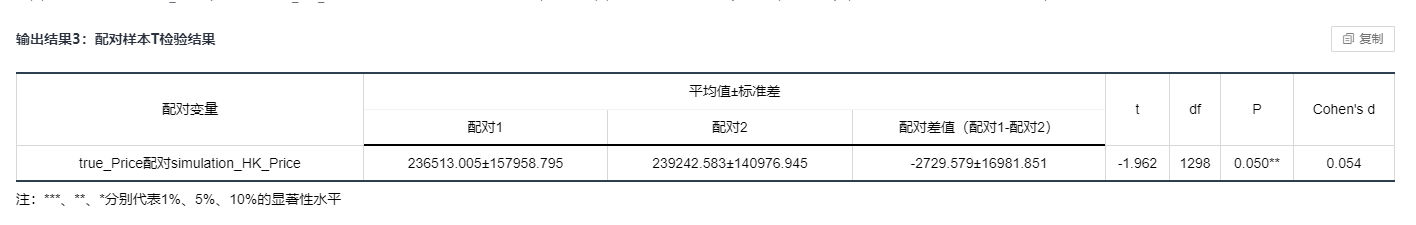

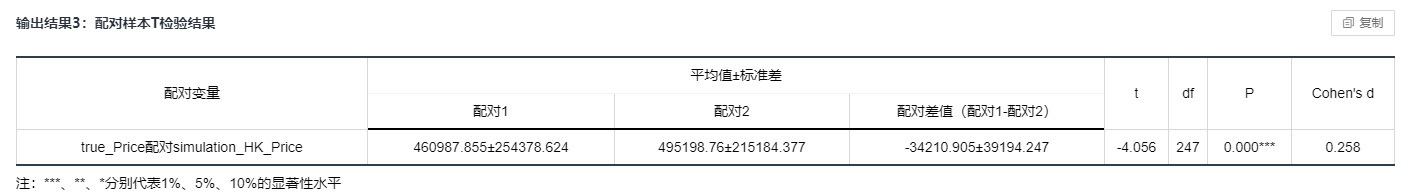